In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/harin/Downloads/archive (13)/sign_mnist_test.csv")

print(data.head())

print(f"Dataset shape: {data.shape}")

print("Unique classes and their counts:")
print(data['label'].value_counts())

num_classes = data['label'].nunique()
print(f"Number of unique classes: {num_classes}")

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

lb = LabelBinarizer()
y = lb.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras import models, layers

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax')  
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=3, 
                    validation_data=(X_val, y_val))


Epoch 1/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.1648 - loss: 2.8343 - val_accuracy: 0.7199 - val_loss: 0.9545
Epoch 2/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8263 - loss: 0.6011 - val_accuracy: 0.9728 - val_loss: 0.1304
Epoch 3/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9766 - loss: 0.0973 - val_accuracy: 1.0000 - val_loss: 0.0132


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0135
Validation accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


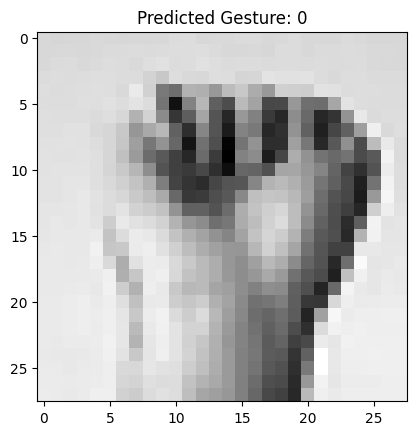

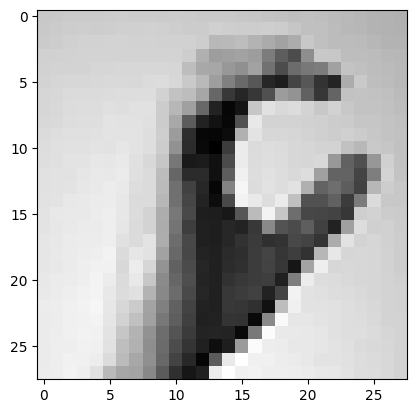

In [18]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc}")
import matplotlib.pyplot as plt
sample_image = X_val[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = lb.inverse_transform(prediction)[0]
plt.imshow(X_val[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Gesture: {predicted_label}")
plt.show()
plt.imshow(X_val[5].reshape(28, 28), cmap='gray')